In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## FIR FILTER coeff.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

In [3]:
numtaps = 5
f = 0.1 #cut-off freq
coeff_1 = signal.firwin(numtaps, f)

print('coeff = ', coeff_1)


coeff =  [0.03383324 0.24012702 0.45207947 0.24012702 0.03383324]


## band-pass FIR FILTER

In [4]:
f1, f2 = 0.1, 0.2
signal.firwin(numtaps, [f1, f2], pass_zero=False)

array([0.02423843, 0.2511022 , 0.52403863, 0.2511022 , 0.02423843])

# FIR FILTER

https://scipy-cookbook.readthedocs.io/items/FIRFilter.html

In [5]:
# create the signal
sample_rate = 100
nsamples = 400
t = np.arange(nsamples) / sample_rate
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
    0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
        0.1*np.sin(2*np.pi*23.45*t+.8)

Taps = [-0.00015829 -0.00026713 -0.00038074 -0.00046841 -0.00049096 -0.0004062
 -0.00017686  0.0002199   0.00078283  0.00147847  0.00223655  0.00295058
  0.0034848   0.00368796  0.00341317  0.00254225  0.00101162 -0.00116362
 -0.00387132 -0.0068933  -0.00990861 -0.01251055 -0.01423761 -0.01461605
 -0.01321063 -0.00967811 -0.00381731  0.00439057  0.01475715  0.02688198
  0.04016963  0.05386862  0.06712917  0.07907448  0.08887843  0.09584141
  0.09945615  0.09945615  0.09584141  0.08887843  0.07907448  0.06712917
  0.05386862  0.04016963  0.02688198  0.01475715  0.00439057 -0.00381731
 -0.00967811 -0.01321063 -0.01461605 -0.01423761 -0.01251055 -0.00990861
 -0.0068933  -0.00387132 -0.00116362  0.00101162  0.00254225  0.00341317
  0.00368796  0.0034848   0.00295058  0.00223655  0.00147847  0.00078283
  0.0002199  -0.00017686 -0.0004062  -0.00049096 -0.00046841 -0.00038074
 -0.00026713 -0.00015829]


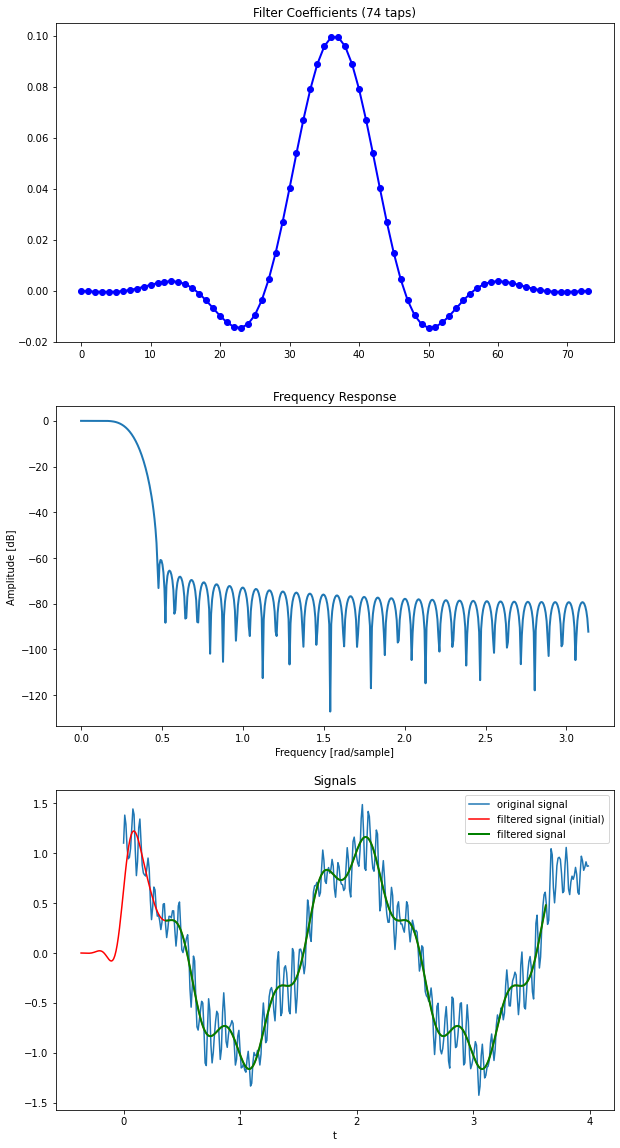

In [11]:
# create a FIR filter and apply it to x

# Nyquist rate of the signal 
# (is the minimum rate at which a finite bandwidth signal needs to be sampled to retain all of the information)
nyq_rate = sample_rate/2

# The desired width of the transition from pass to stop, relative to the Nyquist rate  
# Here it's used a 5 Hz transition width
width = 5/nyq_rate

# The desired attenuation in the stop band (in dB)
ripple_db = 60

# Compute the order and Kaiser parameter for the FIR filter
N, beta = signal.kaiserord(ripple_db, width)
#W = signal.get_window(beta, numtaps)
#print('Kaiser window = ',W)

# The cutoff frequency of the filter
cutoff_freq = 0.1

# firwin with a Kaiser window to create a lowpass FIR filter
taps = signal.firwin(N, cutoff_freq, window=('kaiser', beta))    
print('Taps =',taps)

# To filter x with the FIR filter
filtered_x = signal.lfilter(taps, 1, x)

# PLOTS:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))

# (ax1) Plot the FIR filter coefficients
ax1.plot(taps, 'bo-', linewidth=2)
ax1.set_title('Filter Coefficients (%d taps)' % N)

# (ax2) Plot the frequency response of the filter
w, h = signal.freqz(taps)
ax2.plot(w, 20 * np.log10(abs(h)), linewidth=2)
ax2.set_xlabel('Frequency [rad/sample]')
ax2.set_ylabel('Amplitude [dB]')
ax2.set_title('Frequency Response')

# (ax3) Plot the original and filtered signals

# The phase delay of the filtered signal
delay = 0.5 * (N-1) / sample_rate
ax3.plot(t, x, label='original signal')
# The filtered signal, shifted to compensate for the phase delay
ax3.plot(t-delay, filtered_x, 'r-',label='filtered signal (initial)')
# Plot just the "good" part of the filtered signal
# The first N-1 samples are "corrupted" by the initial conditions
ax3.plot(t[N-1:]-delay, filtered_x[N-1:], 'g',label='filtered signal', linewidth=2)
ax3.set_xlabel('t')
ax3.set_title('Signals')
ax3.legend()

